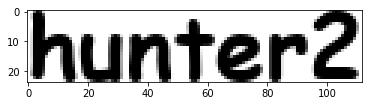

In [21]:
%matplotlib inline
import time
from PIL import Image, ImageDraw, ImageFont, ImageEnhance
from matplotlib.pyplot import imshow, cm
import numpy as np

seed = int(time.time())
SIZE = (300, 30)
FONT = ImageFont.truetype('/Library/Fonts/Comic Sans MS Bold.ttf', 30)
fw, fh = FONT.getmetrics()

def get_noise(seed, size):
    gauss = np.random.normal(1.0, 1.0, (size[1], size[0]))
    return Image.fromarray(gauss, 'L')

def generate_image(password):
    (size, offset) = FONT.font.getsize(password)
    
    bg = get_noise(seed, size).convert('RGB')
    contrast = ImageEnhance.Contrast(bg)
    bg = contrast.enhance(seed)
    
    text = Image.new('RGB', size, (255, 255, 255, 255))
    d = ImageDraw.Draw(text)
    d.text((0, -offset[1]), password, font=FONT, fill=(0,0,0,255))
    
    imshow(text, cmap=cm.gray)
    
    out = Image.blend(text, bg, 0.5)
    contrast = ImageEnhance.Contrast(out)
    out = contrast.enhance(seed / 2.0)
    
    return out.convert("L")
    
img = generate_image("hunter2")

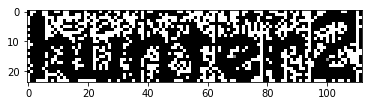

In [22]:
imshow(img, cmap=cm.gray)

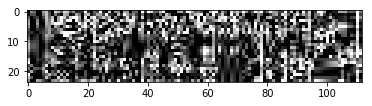

In [23]:
from sfa256.imager import fuck_shit_up

img = fuck_shit_up(img, seed, 10)
imshow(img, cmap=cm.gray)